In [1]:
#D208

#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pip install seaborn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
#Part III: Data Preparation

#C1

# Reading the CSV file
df = pd.read_csv('churn_clean.csv')

# Display initial information about the dataset
print(df.info())

# Check for missing values in the dataset
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [3]:
#C2


# Summary statistics for dependent variable 
monthly_charge_stats = df['MonthlyCharge'].describe()
print("Summary Statistics for Monthly Charges:")
print(monthly_charge_stats)

# Summary statistics for independent variables
relevant_variables = ['Age', 'Children', 'Income', 'Tenure', 'InternetService', 'OnlineSecurity']

relevant_variables_stats = df[relevant_variables].describe()
print("\nSummary Statistics for Relevant Independent Variables:")
print(relevant_variables_stats)

# Summary statistics for InternetService variable
internet_service_stats = df['InternetService'].describe()
print("\nSummary Statistics for InternetService:")
print(internet_service_stats)
internet_service_counts = df['InternetService'].value_counts()
print("\nSummary Statistics for InternetService:")
print(internet_service_counts)

Summary Statistics for Monthly Charges:
count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

Summary Statistics for Relevant Independent Variables:
                Age    Children         Income        Tenure
count  10000.000000  10000.0000   10000.000000  10000.000000
mean      53.078400      2.0877   39806.926771     34.526188
std       20.698882      2.1472   28199.916702     26.443063
min       18.000000      0.0000     348.670000      1.000259
25%       35.000000      0.0000   19224.717500      7.917694
50%       53.000000      1.0000   33170.605000     35.430507
75%       71.000000      3.0000   53246.170000     61.479795
max       89.000000     10.0000  258900.700000     71.999280

Summary Statistics for InternetService:
count           10000
unique              3
top       Fiber Optic
freq             4408
Name: Internet

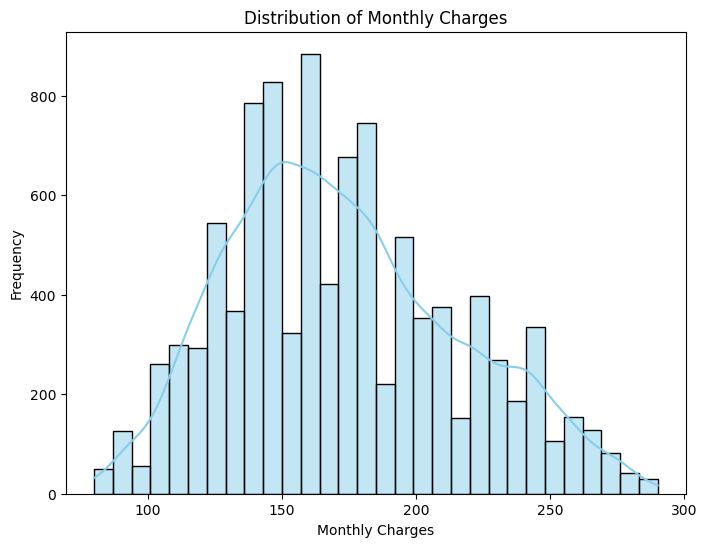

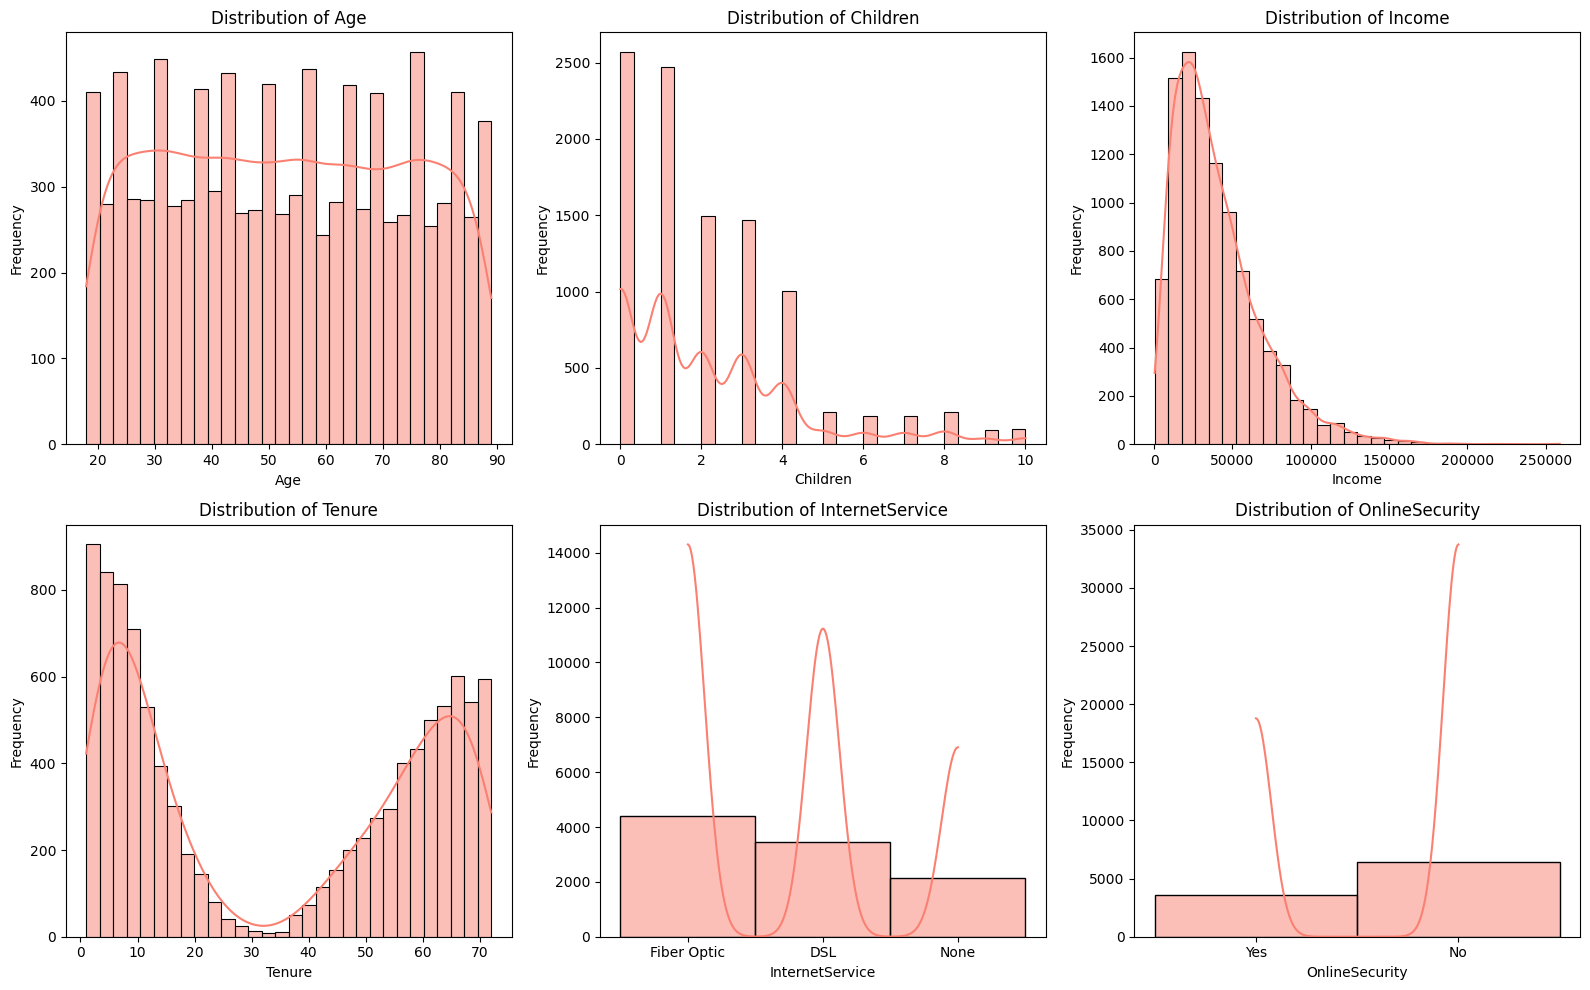

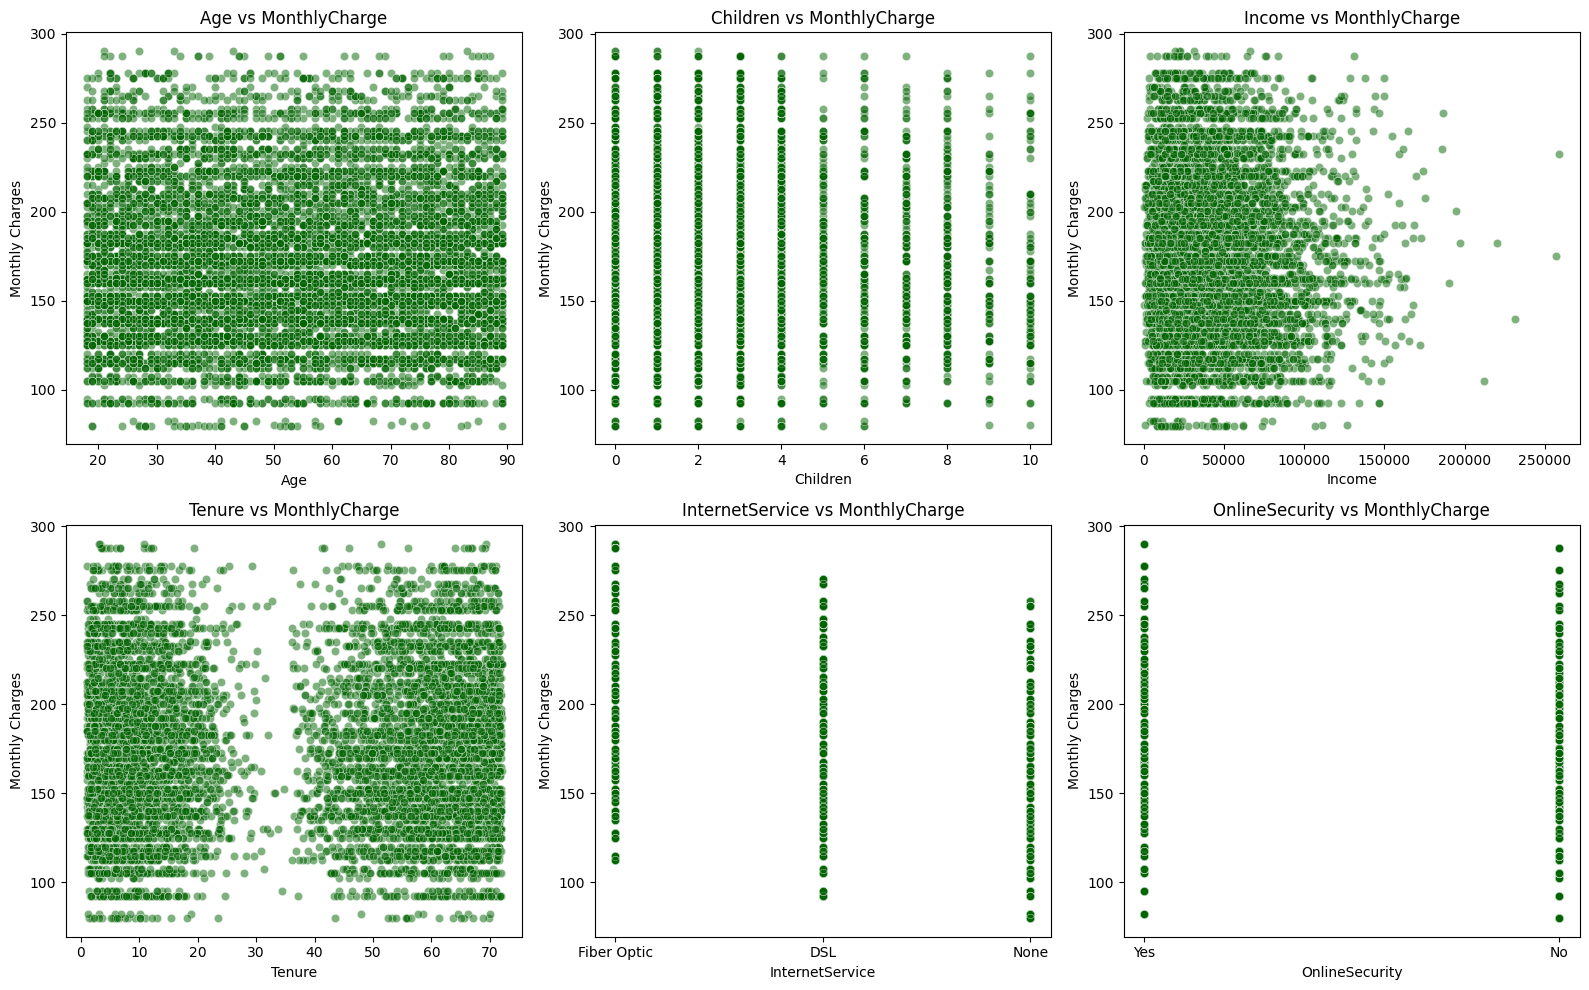

In [4]:
#C3


# Univariate visualizations for each variable
# Histogram for MonthlyCharge
plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharge'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# Histograms for each independent variable
plt.figure(figsize=(16, 10))
for i, col in enumerate(['Age', 'Children', 'Income', 'Tenure', 'InternetService', 'OnlineSecurity'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='salmon')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Bivariate visualizations for MonthlyCharge vs. each independent variable
plt.figure(figsize=(16, 10))
for i, col in enumerate(['Age', 'Children', 'Income', 'Tenure', 'InternetService', 'OnlineSecurity'], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=col, y='MonthlyCharge', color='darkgreen', alpha=0.5)
    plt.title(f'{col} vs MonthlyCharge')
    plt.xlabel(col)
    plt.ylabel('Monthly Charges')
plt.tight_layout()
plt.show()


In [5]:
#C4


# Select numerical and categorical columns
numerical_cols = ['Age', 'Children', 'Income', 'Tenure']
categorical_cols = ['InternetService', 'OnlineSecurity']

# Define preprocessing steps for numerical and categorical columns (Scikit, n.d.)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) 
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))  
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform the data 
processed_data = preprocessor.fit_transform(df)

# Get column names after one-hot encoding
encoded_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(input_features=categorical_cols)

# Combine processed data 
processed_df = pd.DataFrame(processed_data, columns=numerical_cols + list(encoded_columns))

# Save the CSV file
processed_df.to_csv('processed_data.csv', index=False)
print(processed_df.head())



        Age  Children    Income    Tenure  InternetService_DSL  \
0  0.720925 -0.972338 -0.398778 -1.048746                  0.0   
1 -1.259957 -0.506592 -0.641954 -1.262001                  0.0   
2 -0.148730  0.890646 -1.070885 -0.709940                  1.0   
3 -0.245359 -0.506592 -0.740525 -0.659524                  1.0   
4  1.445638 -0.972338  0.009478 -1.242551                  0.0   

   InternetService_Fiber Optic  InternetService_None  OnlineSecurity_Yes  
0                          1.0                   0.0                 1.0  
1                          1.0                   0.0                 1.0  
2                          0.0                   0.0                 0.0  
3                          0.0                   0.0                 1.0  
4                          1.0                   0.0                 0.0  


In [6]:
# D1


# Dependent and independent variables
X = df[['Age', 'Children', 'Income', 'Tenure', 'InternetService', 'OnlineSecurity']]
y = df['MonthlyCharge']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)  

# Add constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     155.6
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          5.72e-219
Time:                        03:57:56   Log-Likelihood:                -51270.
No. Observations:               10000   AIC:                         1.026e+05
Df Residuals:                    9992   BIC:                         1.026e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [10]:
# D2


# Add constant term
X = sm.add_constant(X)

# Fit the initial model
model = sm.OLS(y, X).fit()

# Perform backward elimination
while True:
    p_values = model.pvalues[1:]  
    max_p_value = p_values.max()
    if max_p_value > 0.05:  
        max_p_index = p_values.idxmax()
        X = X.drop(columns=[max_p_index])
        model = sm.OLS(y, X).fit()
    else:
        break

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     362.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          2.36e-223
Time:                        04:09:01   Log-Likelihood:                -51272.
No. Observations:               10000   AIC:                         1.026e+05
Df Residuals:                    9996   BIC:                         1.026e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [11]:
#D3


# Add constant term 
X = sm.add_constant(X)

# Fit the reduced model 
reduced_model = sm.OLS(y, X[['const', 'InternetService_Fiber Optic', 'InternetService_None', 'OnlineSecurity_Yes']]).fit()

# Print the summary
print(reduced_model.summary())



                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     362.3
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          2.36e-223
Time:                        04:29:42   Log-Likelihood:                -51272.
No. Observations:               10000   AIC:                         1.026e+05
Df Residuals:                    9996   BIC:                         1.026e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Residual Standard Error: 40.78121329620971
Summary of Residuals:
Mean: 4.490175342652947e-13
Median: -5.163886601904295
Standard Deviation: 40.78121329620971
Minimum: -74.49769640593888
Maximum: 103.46372986407854


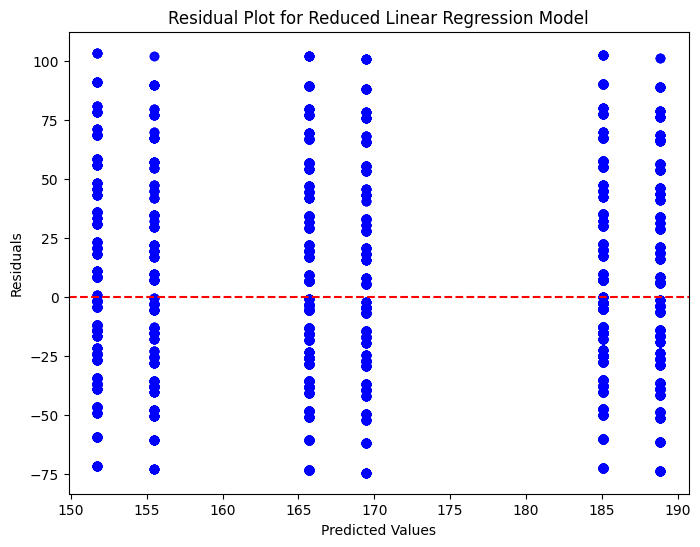

In [20]:
#E2

# Fit the reduced model with selected predictors
X = sm.add_constant(X)
reduced_model = sm.OLS(y, X[['const', 'InternetService_Fiber Optic', 'InternetService_None', 'OnlineSecurity_Yes']]).fit()

# Calculate predictions and residuals
predictions = reduced_model.predict()
residuals = reduced_model.resid


# Calculate summary statistics of the residuals
residual_summary = {
    'Mean': np.mean(residuals),
    'Median': np.median(residuals),
    'Standard Deviation': np.std(residuals),
    'Minimum': np.min(residuals),
    'Maximum': np.max(residuals),
}

# Calculate residual standard error 
rse = np.sqrt(np.mean(residuals**2))

# Print the residual standard error
print(f"Residual Standard Error: {rse}")

# Print the summary statistics
print("Summary of Residuals:")
for stat, value in residual_summary.items():
    print(f"{stat}: {value}")

# Plotting the residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Reduced Linear Regression Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

